Enter drug half-life: 27
Enter drug dose: 40
Enter time since dose: 24
Enter dose frequency: 30


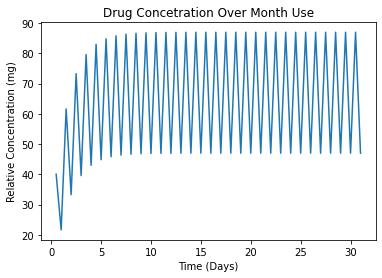

In [23]:
from matplotlib import pyplot as plt

def halflife(hl, dose, time):
    # Half-life formula
    current_con = dose * ((1/2)**(time/hl))
    return current_con

def concentration_over_time(hl, dose, time_interval=24, time_period=30):
    # time_interval = hours
    # time_period = days
    dose_schedule = [i for i in range(0, time_period*24, int(24*(24/time_interval)))]
    #print(month_dose_schedule)

    concentration_interval = [dose, halflife(hl, dose, time_interval)]
    i = 1
    while len(dose_schedule)*2 >= len(concentration_interval):
        concentration_interval.append(concentration_interval[i] + dose)
        concentration_interval.append(halflife(hl, concentration_interval[i+1], time_interval))
        i += 2
    #print(concentration_interval)
    
    concentration_schedule = {i+1:concentration_interval[i] for i in range(len(concentration_interval))}
    #print(concentration_schedule)
    time_points = [k/2 for k in concentration_schedule.keys()]
    
    return time_points, concentration_interval

#lexapro_concentration = concentration_over_time(27, 40)
#print(lexapro_concentration)
#caffeine_concentration = concentration_over_time(4, 140)
#print(caffeine_concentration)

hl = input("Enter drug half-life (hours): ")
dose = input("Enter drug dose: ")
time = input("Enter time since dose (hours): ")
time_period = input("Enter dose frequency (days): ")

plt.plot(lexapro_concentration[0], lexapro_concentration[1])
plt.title("Drug Concetration Over Month Use")
plt.xlabel("Time (Days)")
plt.ylabel("Relative Concentration (mg)")
plt.show()